In [44]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = (np.load("mnist.npz"))
print(mnist)

NpzFile 'mnist.npz' with keys: x_test, x_train, y_train, y_test


In [3]:
scaler = StandardScaler()
x_test, x_train, y_train, y_test = mnist["x_test"].reshape(-1, 28*28), mnist["x_train"].reshape(-1, 28*28), mnist["y_train"], mnist["y_test"]
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

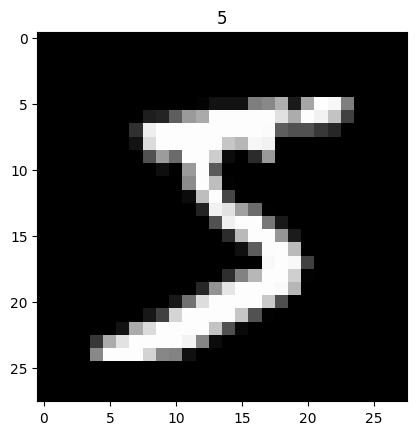

In [41]:
plt.title(mnist["y_train"][0])
plt.imshow(mnist["x_train"][0], cmap='gray')
plt.show()

In [31]:
logistic_model = LogisticRegression(
    C=10,
    solver='saga',  # Good for large datasets
    max_iter=1000,  # Maximum iterations (can be large)
    multi_class='multinomial',  # Explicitly set to 'multinomial'
    tol=0.005,  # Tolerance for stopping (small error)
    n_jobs=-1,
    verbose=1,
)
logistic_model.fit(x_train, y_train)

/home/arash/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


9, change: 0.0081016963
Epoch 50, change: 0.0079735957
Epoch 51, change: 0.0079087541
Epoch 52, change: 0.0077982787
Epoch 53, change: 0.0076267103
Epoch 54, change: 0.0075365548
Epoch 55, change: 0.0074139608
Epoch 56, change: 0.0073450141
Epoch 57, change: 0.0072112274
Epoch 58, change: 0.0071698372
Epoch 59, change: 0.007045539
Epoch 60, change: 0.0069694173
Epoch 61, change: 0.006880255
Epoch 62, change: 0.0067763211
Epoch 63, change: 0.0066774401
Epoch 64, change: 0.0066344812
Epoch 65, change: 0.0065875273
Epoch 66, change: 0.0064247981
Epoch 67, change: 0.006370039
Epoch 68, change: 0.0062945642
Epoch 69, change: 0.006246536
Epoch 70, change: 0.0062075335
Epoch 71, change: 0.0061425895
Epoch 72, change: 0.0060869556
Epoch 73, change: 0.0060433805
Epoch 74, change: 0.0059987674
Epoch 75, change: 0.0059439909
Epoch 76, change: 0.0058744774
Epoch 77, change: 0.0058354567
Epoch 78, change: 0.0057986652
Epoch 79, change: 0.0057541255
Epoch 80, change: 0.0057093178
Epoch 81, change: 0

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.005, verbose=1)

In [36]:
y_pred = logistic_model.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9218


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.94      0.89      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.89      0.87      0.88       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



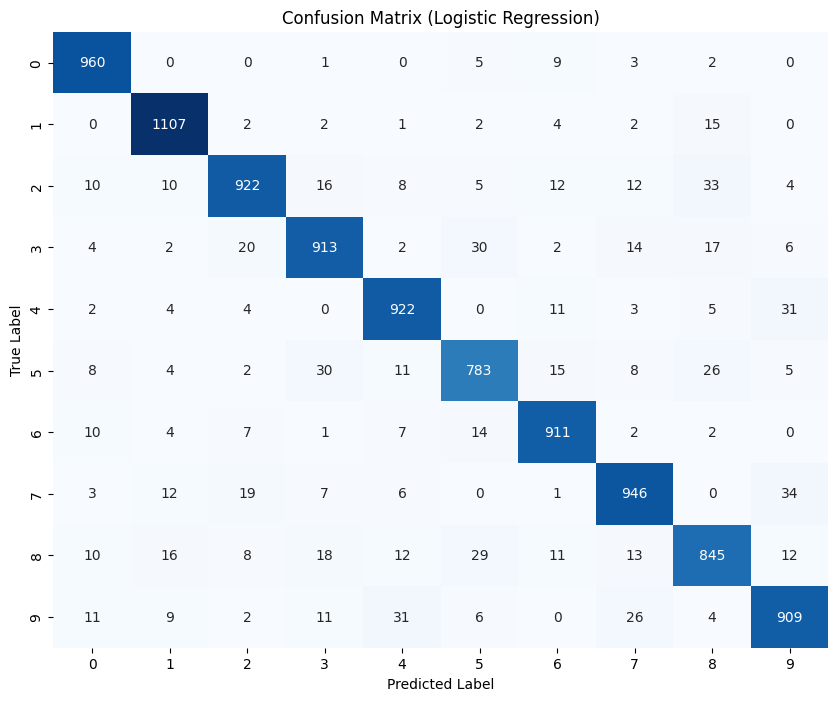

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
def  plot_roc_curve_auc():
    y_test_bin = label_binarize(y_train, classes=np.arange(10))
    y_score = logistic_model.decision_function(x_train)

    plt.figure(figsize=(10, 8))
    for i in range(10):
         fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
         roc_auc = auc(fpr, tpr)
         plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
         plt.xlim([0.0, 1.0])
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # خط قطر (مدل تصادفی)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for MNIST Classification')
    plt.legend(loc="lower right")
    plt.show()

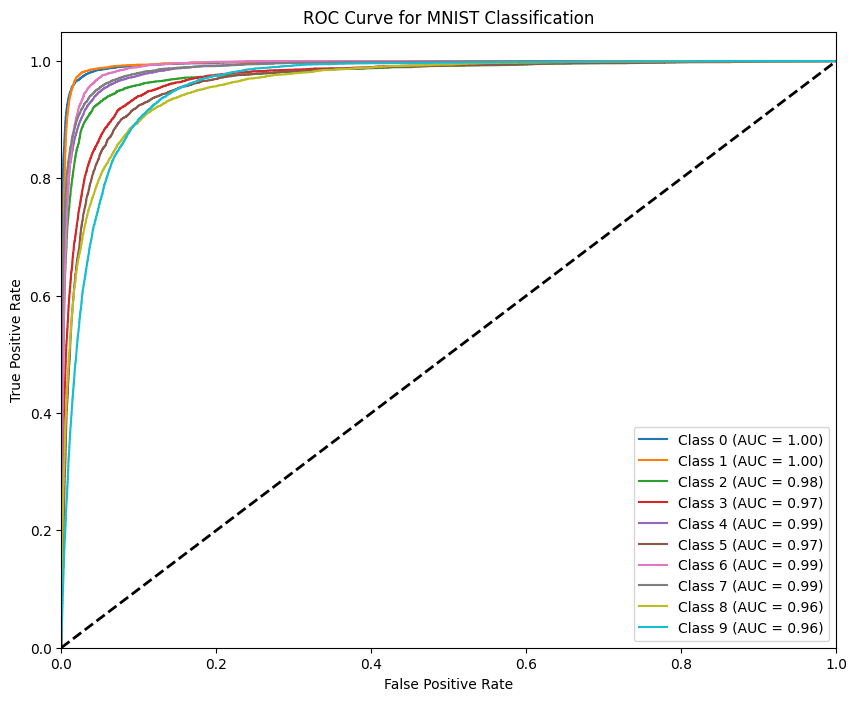

In [51]:
plot_roc_curve_auc()

In [52]:
logistic_model = LogisticRegression(
    C=1,  # Explained below
    solver='saga',  # Good for large datasets
    max_iter=1000,  # Maximum iterations (can be large)
    multi_class='multinomial',  # Explicitly set to 'multinomial'
    tol=0.005,  # Tolerance for stopping (small error)
    n_jobs=-1,
    verbose=1,
)
logistic_model.fit(x_train, y_train)

/home/arash/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


convergence after 100 epochs took 115 seconds


LogisticRegression(C=1, max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.005, verbose=1)

In [53]:
y_pred = logistic_model.predict(x_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9218


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.94      0.89      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.89      0.87      0.88       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



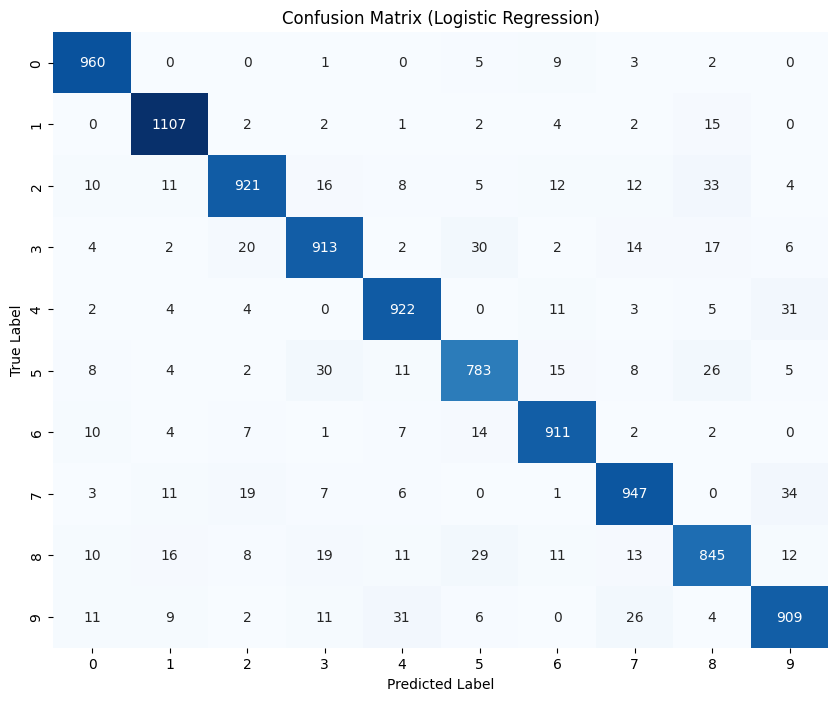

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

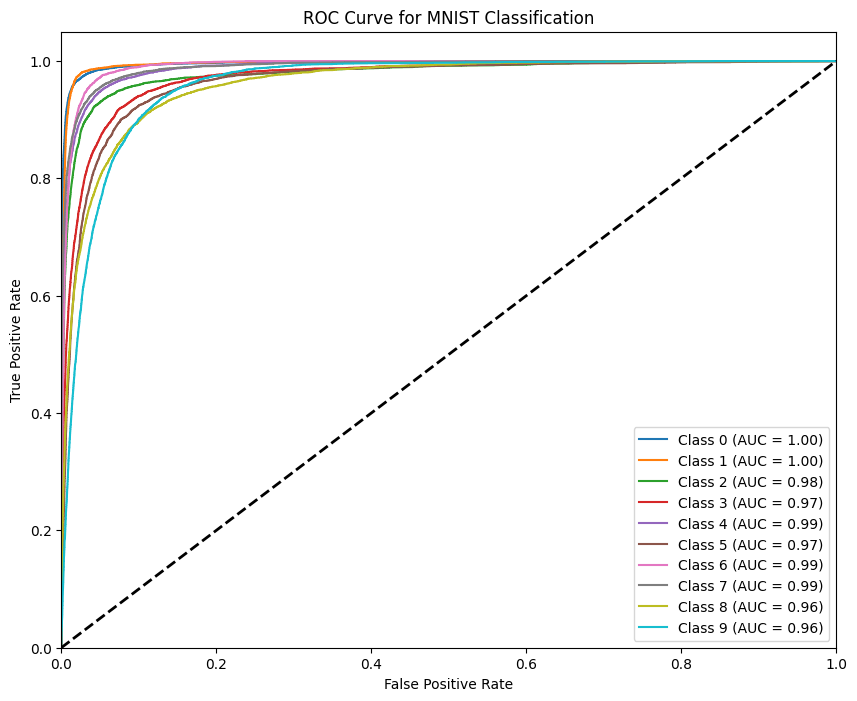

In [57]:
plot_roc_curve_auc()

In [59]:
logistic_model = LogisticRegression(
    C=0.1,  # Explained below
    solver='saga',  # Good for large datasets
    max_iter=1000,  # Maximum iterations (can be large)
    multi_class='multinomial',  # Explicitly set to 'multinomial'
    tol=0.005,  # Tolerance for stopping (small error)
    n_jobs=-1,
    verbose=1,
)
logistic_model.fit(x_train, y_train)

/home/arash/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


05562878
Epoch 85, change: 0.00551501
Epoch 86, change: 0.0054838905
Epoch 87, change: 0.0054490577
Epoch 88, change: 0.0054037938
Epoch 89, change: 0.005366784
Epoch 90, change: 0.0053371958
Epoch 91, change: 0.0053004938
Epoch 92, change: 0.0052608246
Epoch 93, change: 0.0052447631
Epoch 94, change: 0.0051982211
Epoch 95, change: 0.0051643001
Epoch 96, change: 0.0051239026
Epoch 97, change: 0.0050759671
Epoch 98, change: 0.0050588499
Epoch 99, change: 0.0050146662
Epoch 1, change: 1
Epoch 2, change: 0.23734372
Epoch 3, change: 0.12343426
Epoch 4, change: 0.08477259
Epoch 5, change: 0.067996312
Epoch 6, change: 0.056230984
Epoch 7, change: 0.04786939
Epoch 8, change: 0.042358217
Epoch 9, change: 0.037442259
Epoch 10, change: 0.033202291
Epoch 11, change: 0.030004774
Epoch 12, change: 0.027197932
Epoch 13, change: 0.024946833
Epoch 14, change: 0.023139583
Epoch 15, change: 0.021700786
Epoch 16, change: 0.020583346
Epoch 17, change: 0.01946774
Epoch 18, change: 0.018540409
Epoch 19, cha

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.005, verbose=1)

In [60]:
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9216


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.94      0.89      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.89      0.87      0.88       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



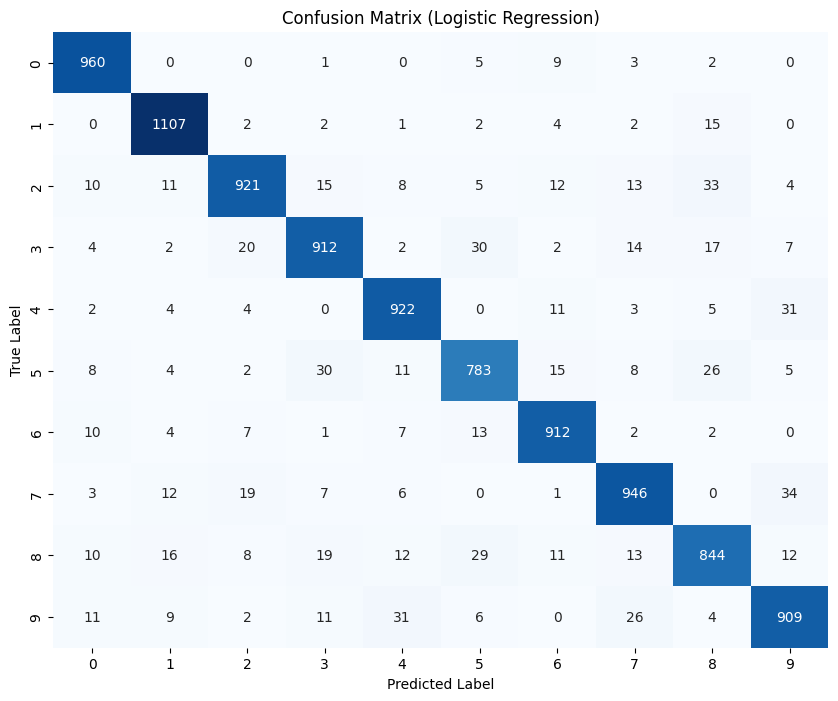

In [62]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

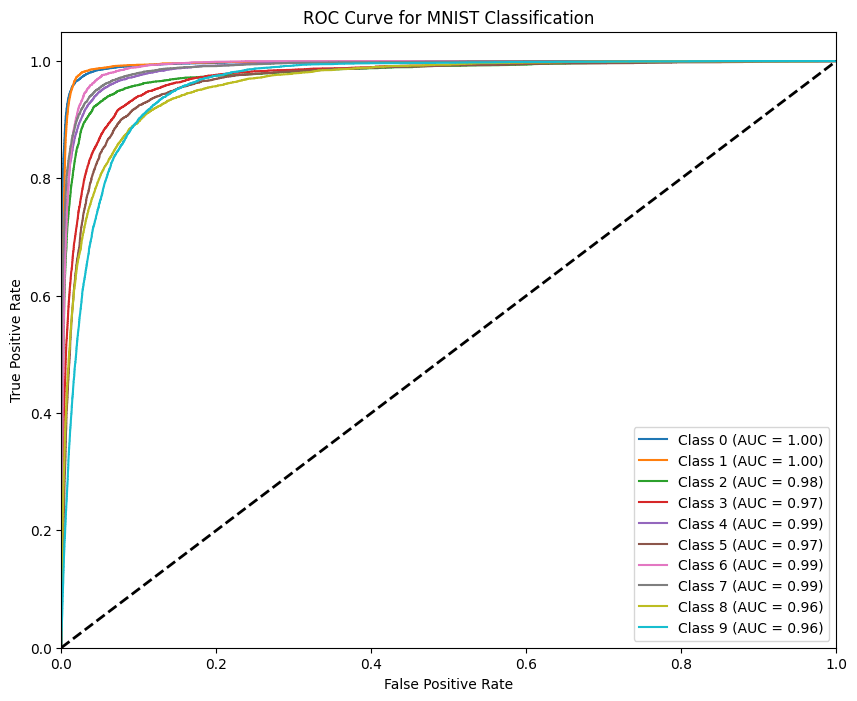

In [63]:
plot_roc_curve_auc()